# Makemore - Building Character Level Language Model

## Reading the dataset

In [1]:
# read the file
words = open('names.txt', 'r').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

32033 names in the file

In [4]:
min(len(w) for w in words) # min number of letters in the name

2

In [5]:
max(len(w) for w in words) # max number of letters in the name

15

## Bi-gram Language Model

In the bi-gram language model, we are always looking at the 2 characters at the time. We are only looking at the character we are given and we are trying to predict the next character in the sequence. We are always looking at the previous character to predict the next character. It is simple and weak model, but it is good start.

# Exploring bigrams in the dataset

Create bigram

In [6]:
b = {} # bi-gram dictionary: maintains counts of the bigrams
# iterate through the words
for w in words:
    chs = ['<S>'] + list(w) + ['<E>'] # <S> - start token, <E> - end token
    # Iterate the words with consecutive characters - 2 characters at the time, sliding through the word
    for ch1, ch2 in zip(chs, chs[1:]): # https://www.w3schools.com/python/ref_func_zip.asp
        bigram = (ch1,ch2) # constructing a bigram
        b[bigram] = b.get(bigram, 0) + 1 # b.get(bigram) sames as b[bigram]. In case, bigram is not in the dictionary, return 0 by default

In [7]:
sorted(b.items(), key = lambda kv: -kv[1]) # statistics of entire dataset

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

# Store bigrams information in 2-D array, PyTorch

In [8]:
import torch

Store the information in 2D array (rows - first character, columns - second character) in bi-grams. We are going to use PyTorch for that. Torch.Tensor which allows us multi-dimensional arrays and manipulate them very efficiently.

In [9]:
a = torch.zeros((3,5), dtype = torch.int32) # by default its torhc.float32
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [10]:
# changing the values in tensors
a[1, 3] = 1
a[1, 3] += 1 # we can do like this as well

In [11]:
N = torch.zeros((27,27), dtype = torch.int32)

In [12]:
# create a sorted list of unique characters
chars = sorted(list(set(''.join(words))))
# Create a look-up table
stoi = {s:i+1 for i,s in enumerate(chars)} # s (string-character) to i (index)
stoi['.'] = 0
# Invert an array
itos = {i:s for s,i in stoi.items()}

In [13]:
for w in words:
    chs = ['.'] + list(w) + ['.'] # <S> - start token, <E> - end token
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1

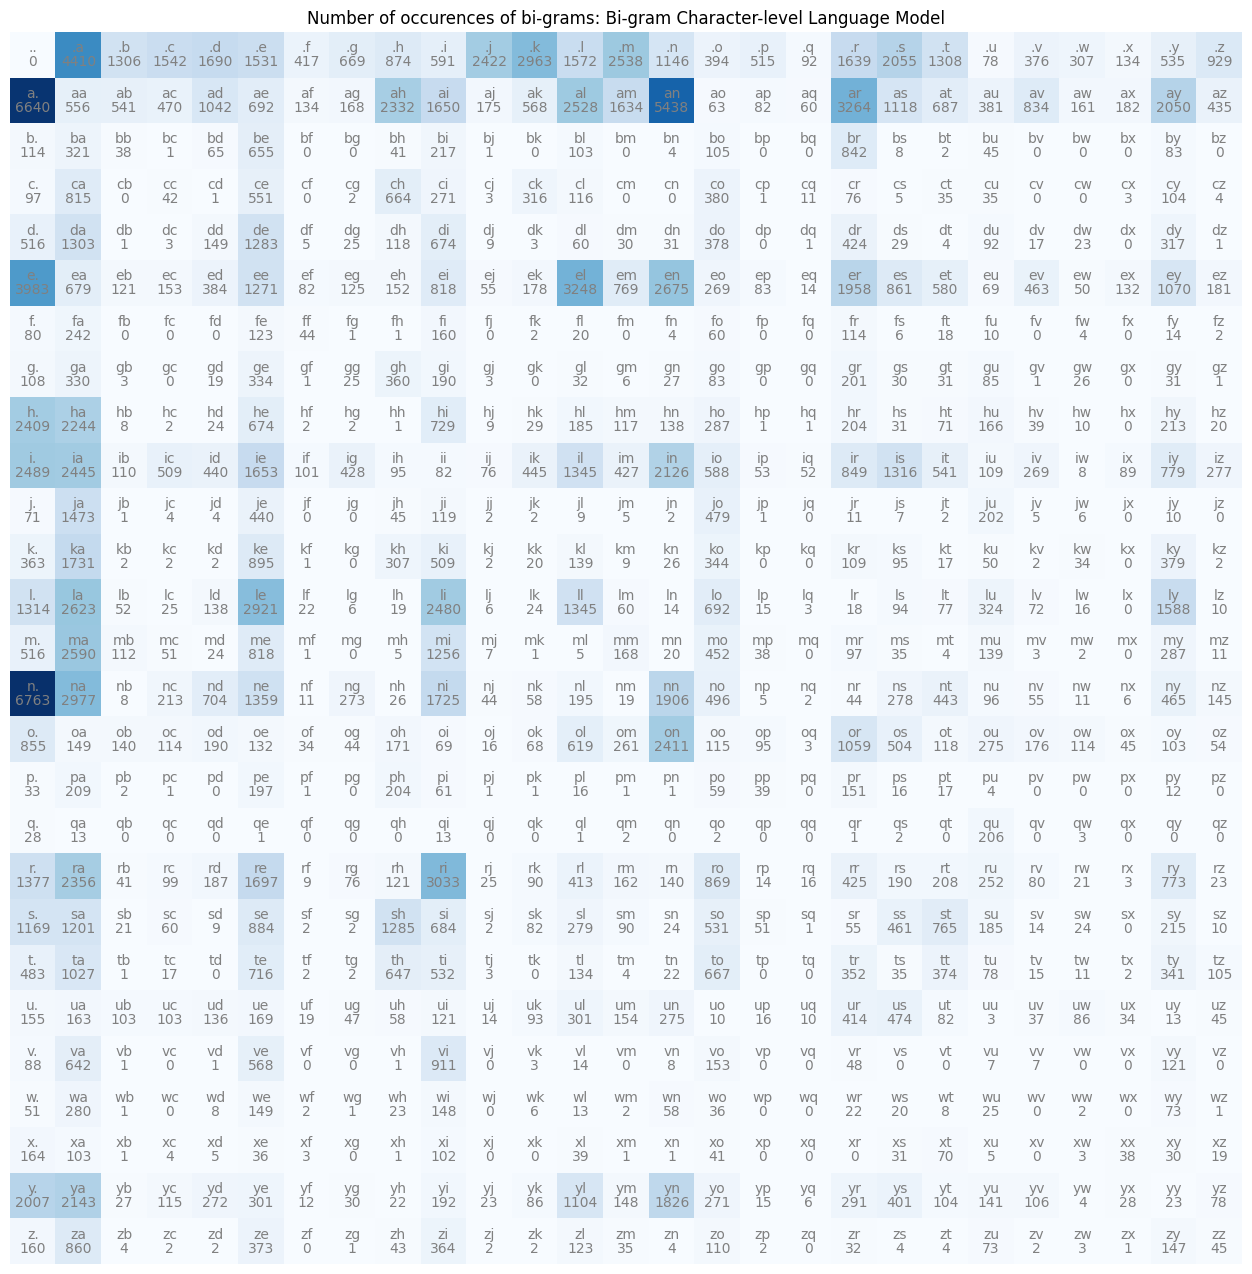

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.title("Number of occurences of bi-grams: Bi-gram Character-level Language Model")
plt.axis("off");

This array has all the information to sample from the bi-gram character level language model.

In [15]:
N[0, :] # First row

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [16]:
# Get the shape of the 2-D array
N[0, :].shape

torch.Size([27])

In [17]:
N[0] # this is equivalent to N[0,:]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

We would like to sample from this vector (first row, see line 15 and 17). To do this, we need to create a probability vector.

In [18]:
# create a probability vector
p = N[0].float() # convert to float to normalize the counts
p = p / p.sum() # to create a probability distribution, we need to divide p by p.sum()
p # a vector of probabilities, probability of any single character to be the first character in the word

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

Let's sample from the distribution. We are going to use PyTorch.Multinomial. Returns samples from multinomial probability distribution. 

https://pytorch.org/docs/stable/generated/torch.multinomial.html

What is a multinomial distribution?

The multinomial distribution is used to find probabilities in experiments where there are more than two outcomes (https://stattrek.com/probability-distributions/multinomial)

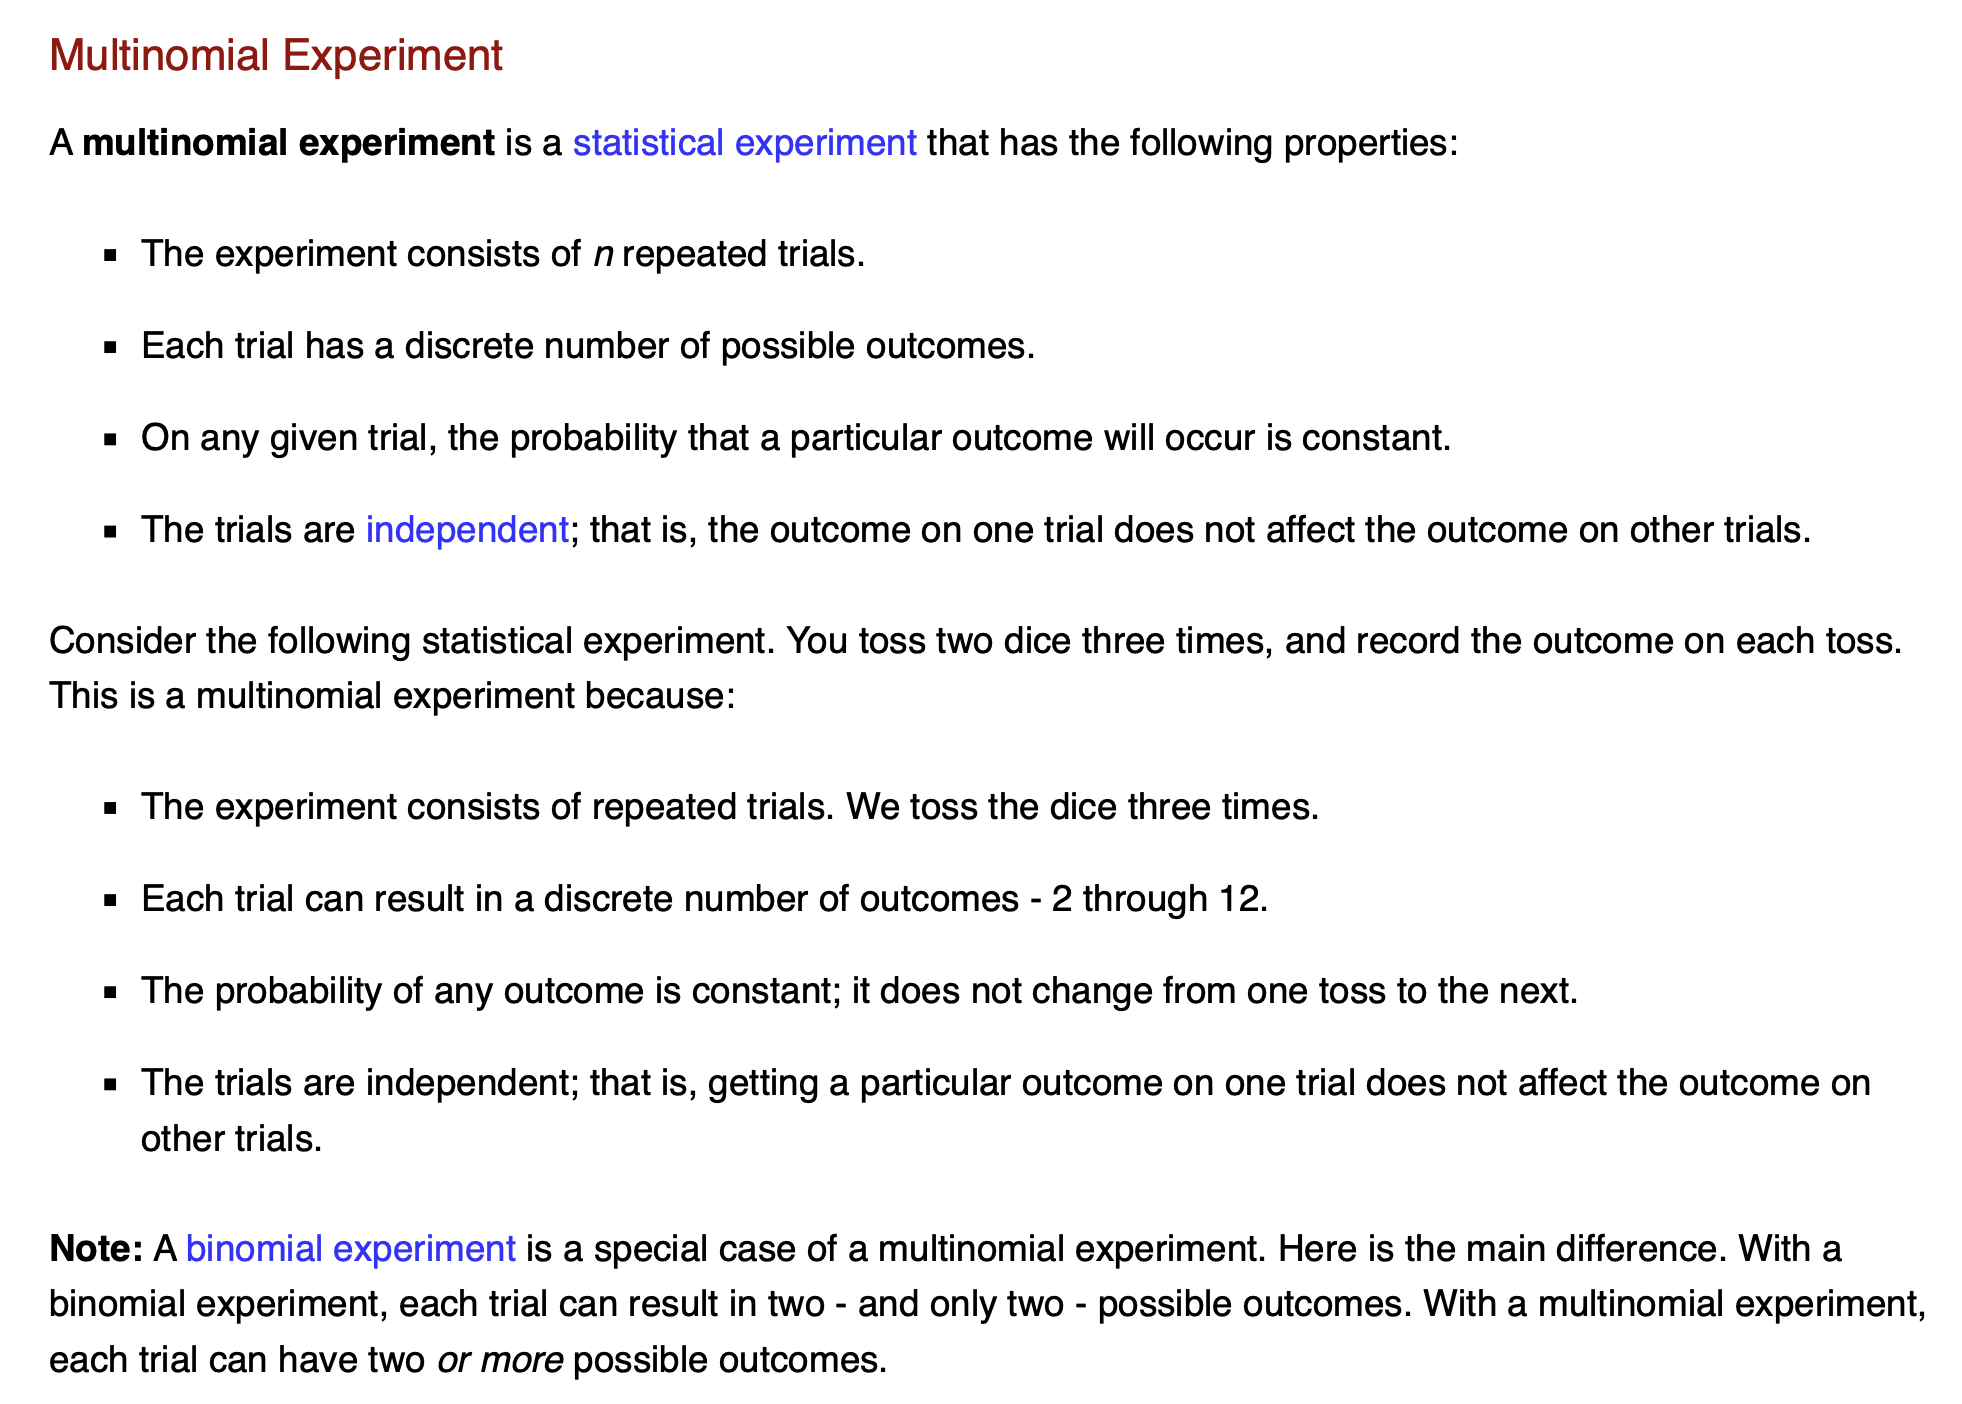

In [19]:
g = torch.Generator().manual_seed(2147483647) # deterministic way to create torch Generator object seeding it with some number
p = torch.rand(3, generator=g)
p = p / p.sum()
p 

tensor([0.6064, 0.3033, 0.0903])

The probability of the first element of the tensor is 60%. In the below tensor, we would expect 60% of them to be 0. 30% to be 1. 10% to be 2. 

We can sample as many as we like.

In [20]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [21]:
g = torch.Generator().manual_seed(2147483647) 
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'a'

## Train the model

We are going to train our Bi-gram Character-level Language Model model by looking at the counts of all bi-grams and normalazing the rows to get the probability distributions.

In [22]:
# Matrix of probabilities - EFFICIENCY!!!
# It will be the same matrix as N but every single row will have a row of probabilities that are normalized to 1
# indicating the probability distribution for the next character given the character before it
P = N.float() # transform the data type to float
# We need to sum each row of the matrix in the given dimension
# P = P / P.sum() - wrong! , since P.sum() sums all of the counts of entire matrix N

# We want to simultaneously and in parallel divide all the rows by their respective sums

In [23]:
P.shape

torch.Size([27, 27])

In [24]:
P.sum(0, keepdim=True) # sum vertically (first column)

tensor([[32033., 33885.,  2645.,  3532.,  5496., 20423.,   905.,  1927.,  7616.,
         17701.,  2900.,  5040., 13958.,  6642., 18327.,  7934.,  1026.,   272.,
         12700.,  8106.,  5570.,  3135.,  2573.,   929.,   697.,  9776.,  2398.]])

In [25]:
P.sum(1, keepdim=True) # sum horizontally

tensor([[32033.],
        [33885.],
        [ 2645.],
        [ 3532.],
        [ 5496.],
        [20423.],
        [  905.],
        [ 1927.],
        [ 7616.],
        [17701.],
        [ 2900.],
        [ 5040.],
        [13958.],
        [ 6642.],
        [18327.],
        [ 7934.],
        [ 1026.],
        [  272.],
        [12700.],
        [ 8106.],
        [ 5570.],
        [ 3135.],
        [ 2573.],
        [  929.],
        [  697.],
        [ 9776.],
        [ 2398.]])

In [26]:
P = P / P.sum(1, keepdim=True) # keepdim is necessary
P # the elements of array P are the parameters of our bi-gram language model given us a summarizing statistics of bi-grams.

tensor([[0.0000e+00, 1.3767e-01, 4.0770e-02, 4.8138e-02, 5.2758e-02, 4.7794e-02,
         1.3018e-02, 2.0885e-02, 2.7284e-02, 1.8450e-02, 7.5610e-02, 9.2498e-02,
         4.9074e-02, 7.9231e-02, 3.5776e-02, 1.2300e-02, 1.6077e-02, 2.8720e-03,
         5.1166e-02, 6.4153e-02, 4.0833e-02, 2.4350e-03, 1.1738e-02, 9.5839e-03,
         4.1832e-03, 1.6702e-02, 2.9001e-02],
        [1.9596e-01, 1.6408e-02, 1.5966e-02, 1.3870e-02, 3.0751e-02, 2.0422e-02,
         3.9546e-03, 4.9579e-03, 6.8821e-02, 4.8694e-02, 5.1645e-03, 1.6763e-02,
         7.4605e-02, 4.8222e-02, 1.6048e-01, 1.8592e-03, 2.4199e-03, 1.7707e-03,
         9.6326e-02, 3.2994e-02, 2.0274e-02, 1.1244e-02, 2.4613e-02, 4.7514e-03,
         5.3711e-03, 6.0499e-02, 1.2838e-02],
        [4.3100e-02, 1.2136e-01, 1.4367e-02, 3.7807e-04, 2.4575e-02, 2.4764e-01,
         0.0000e+00, 0.0000e+00, 1.5501e-02, 8.2042e-02, 3.7807e-04, 0.0000e+00,
         3.8941e-02, 0.0000e+00, 1.5123e-03, 3.9698e-02, 0.0000e+00, 0.0000e+00,
         3.1834e-

Can we do an operation like this:

```python
# Matix 
27, 27

# Row
27, 1 # copies 1 to match 27 (27 times) to make 27,27 match 27,1. Then it does element-wise division

```

https://pytorch.org/docs/stable/notes/broadcasting.html  - READ, and UNDERSTAND

```python
P = N.float()
P = P / P.sum(1) # BUG , it will broadcast, keepdim is necessary


# 27, 27
# 1, 27, it will take a row and copy it vertically (27). We are normalizing columns, not rows

# The issue comes from the silent adding of a dimension
```

See - https://www.youtube.com/watch?v=PaCmpygFfXo&t=2910s

### Broadcasting 

What is broadcasting?

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. It does this without making needless copies of data and usually leads to efficient algorithm implementations. There are, however, cases where broadcasting is a bad idea because it leads to inefficient use of memory that slows computation. (https://numpy.org/doc/stable/user/basics.broadcasting.html)

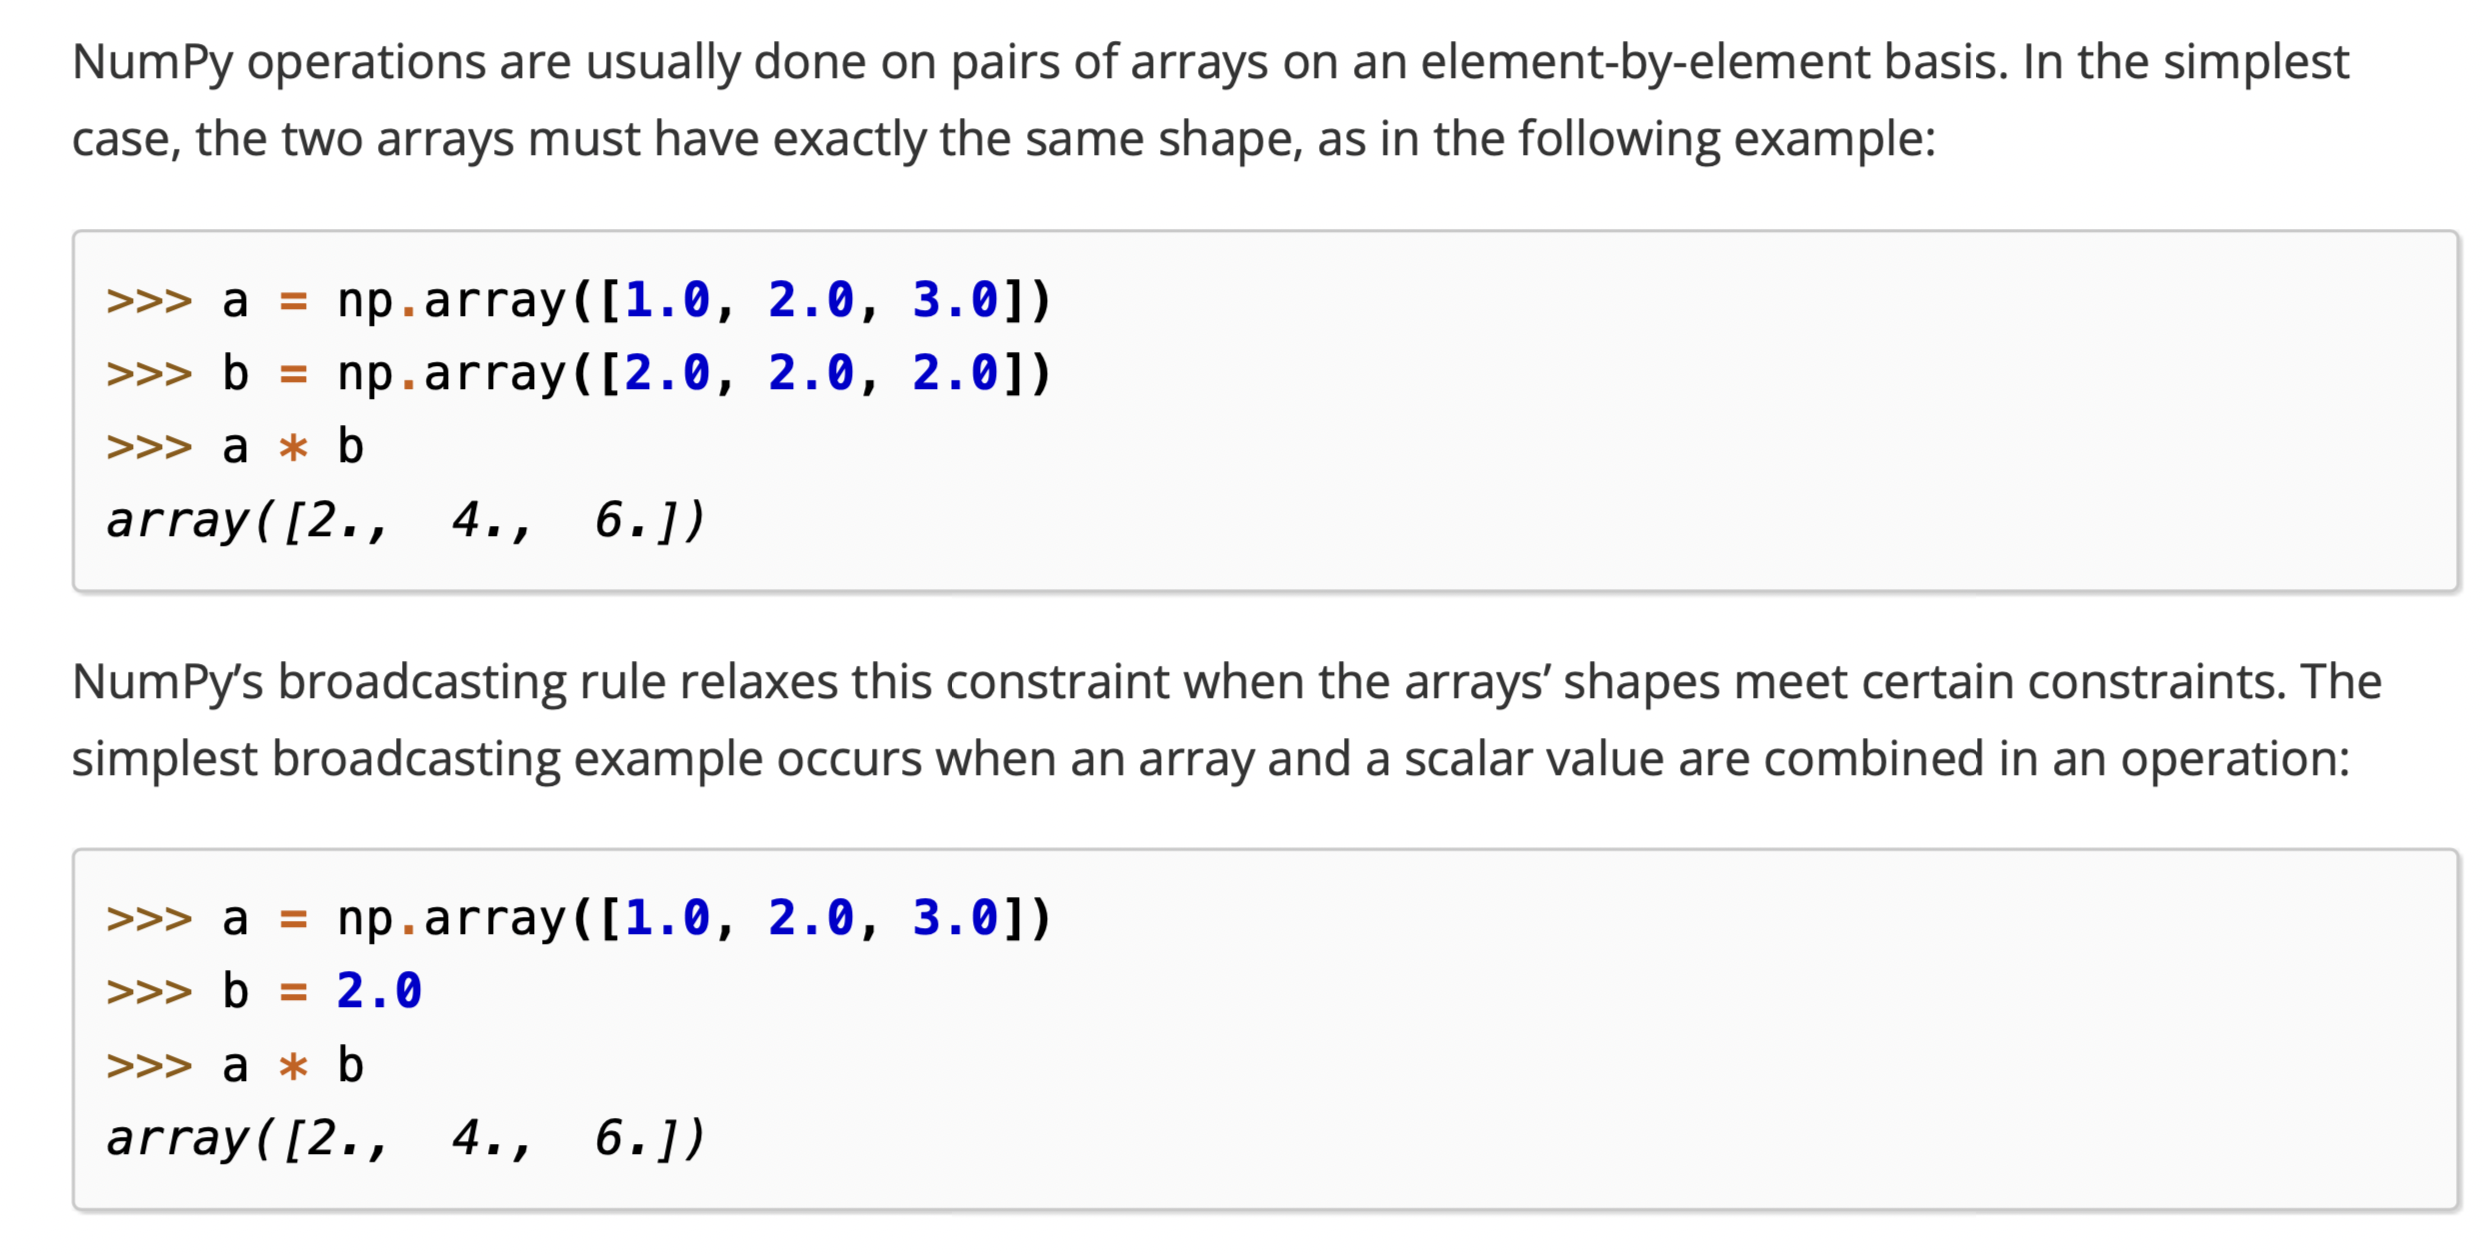

The result is equivalent to the previous example where b was an array. We can think of the scalar b being stretched during the arithmetic operation into an array with the same shape as a. The new elements in b, as shown in Figure 1, are simply copies of the original scalar. The stretching analogy is only conceptual. NumPy is smart enough to use the original scalar value without actually making copies so that broadcasting operations are as memory and computationally efficient as possible.

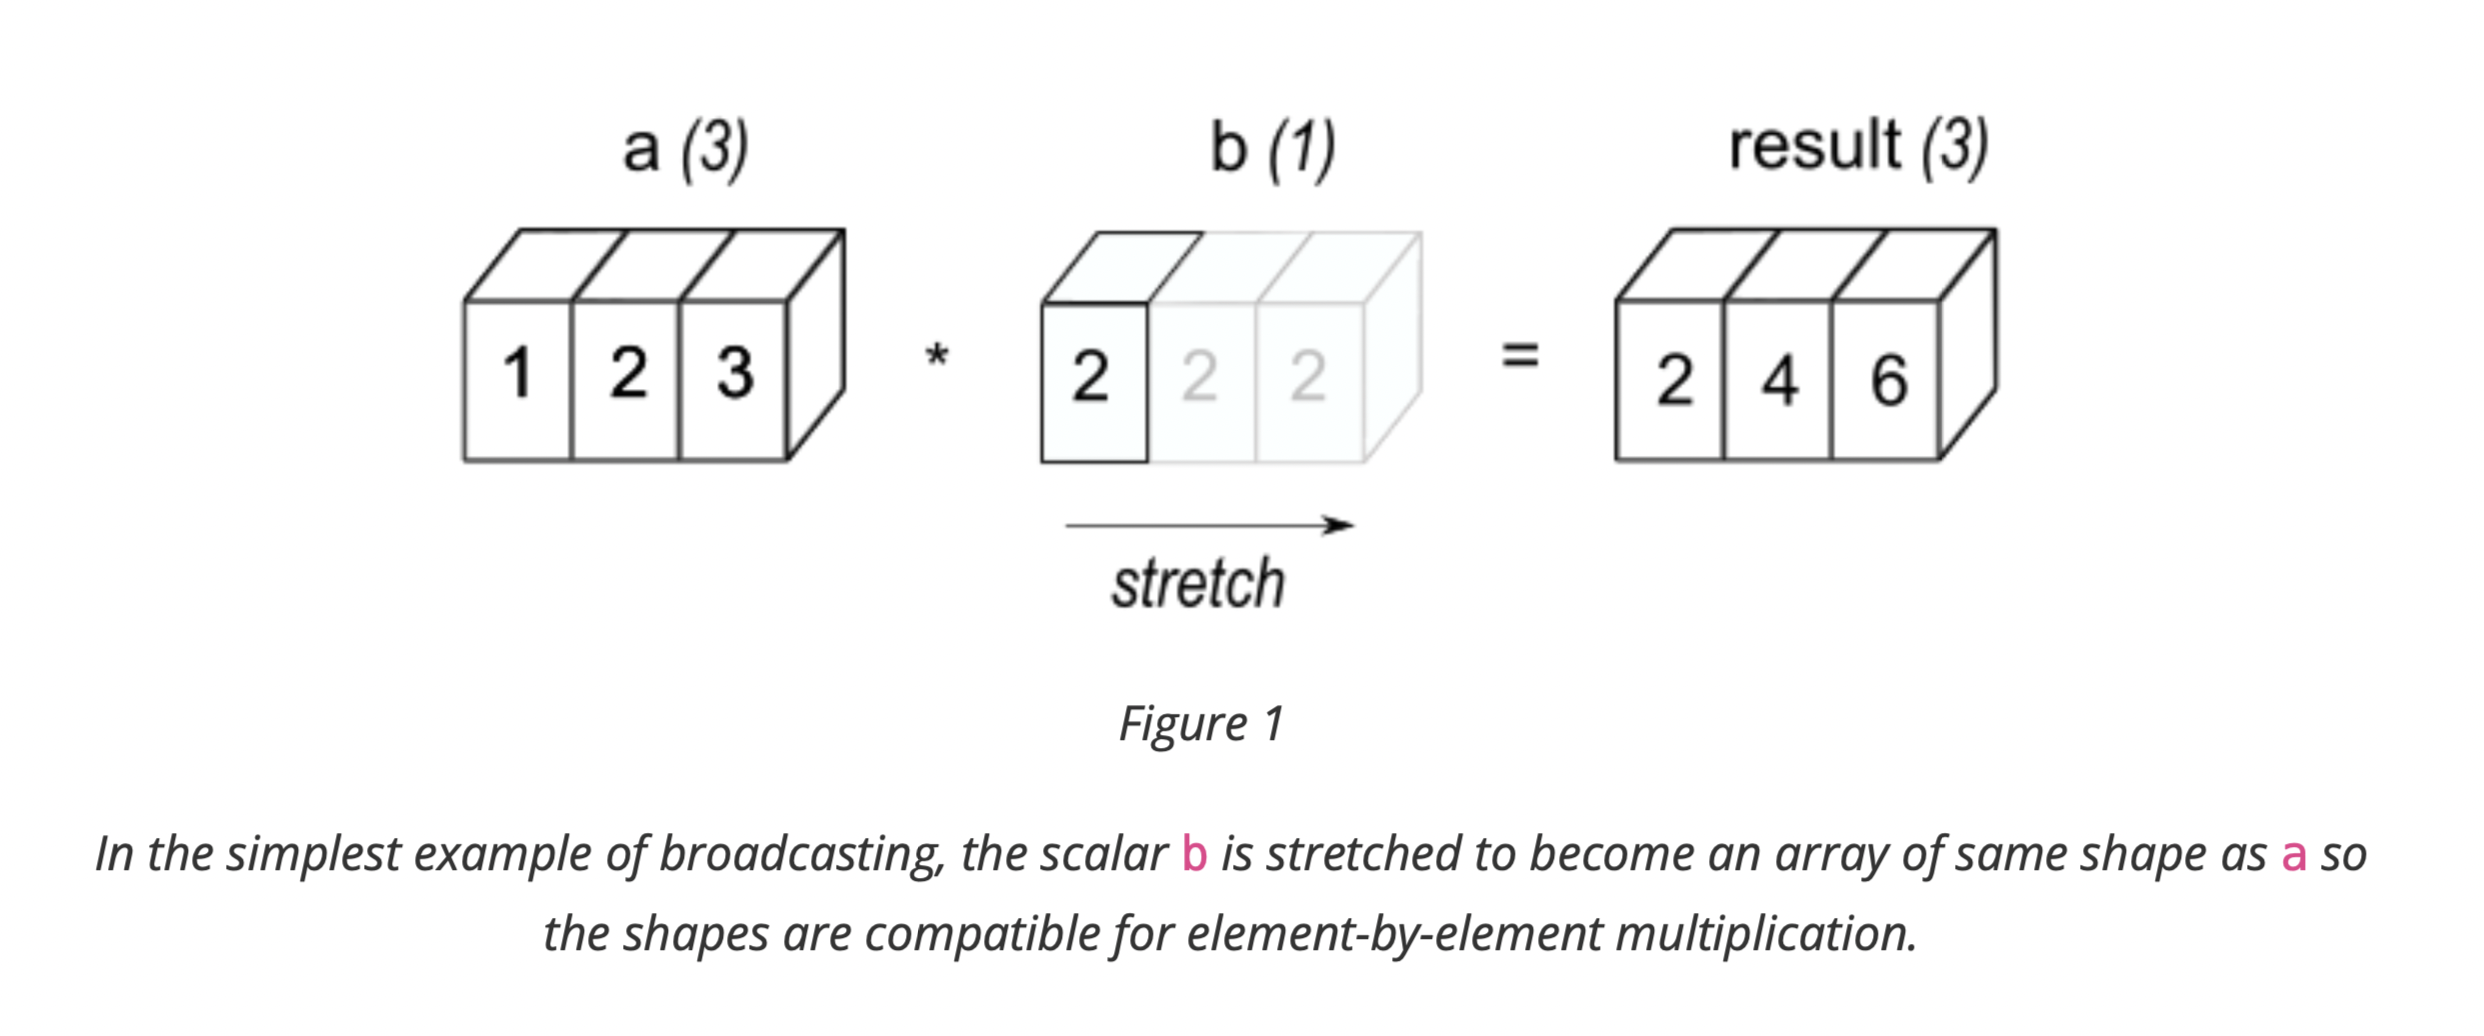


### Broadcasting Rules
When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimensions and works its way left. Two dimensions are compatible when

they are equal, or
one of them is 1
If these conditions are not met, a ValueError: operands could not be broadcast together exception is thrown, indicating that the arrays have incompatible shapes. The size of the resulting array is the size that is not 1 along each axis of the inputs.

Arrays do not need to have the same number of dimensions. For example, if you have a 256x256x3 array of RGB values, and you want to scale each color in the image by a different value, you can multiply the image by a one-dimensional array with 3 values. Lining up the sizes of the trailing axes of these arrays according to the broadcast rules, shows that they are compatible:

```python
Image  (3d array): 256 x 256 x 3
Scale  (1d array):             3
Result (3d array): 256 x 256 x 3
```

When either of the dimensions compared is one, the other is used. In other words, dimensions with size 1 are stretched or “copied” to match the other.

In the following example, both the A and B arrays have axes with length one that are expanded to a larger size during the broadcast operation:

```python
A      (4d array):  8 x 1 x 6 x 1
B      (3d array):      7 x 1 x 5
Result (4d array):  8 x 7 x 6 x 5
```

### PyTorch Broadcast
In short, if a PyTorch operation supports broadcast, then its Tensor arguments can be automatically expanded to be of equal sizes (without making copies of the data).

Two tensors are “broadcastable” if the following rules hold:

- Each tensor has at least one dimension.
- When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.

## Sample from the model

We, then use the parameters of the model to sample new words (new names) according to those distributions.

In [27]:
g = torch.Generator().manual_seed(2147483647) 
print("Generating names")
print("================")
for i in range(5):
    out = []
    ix = 0 # start token
    while True:
        p = P[ix] # grab the row corresponding to the index that we are currently on
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix]) # grab the character from the look-up table by the index that we get from multinomial distribution
        if ix == 0: # 0 - is the end token
            break
    print(''.join(out))

Generating names
mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


## Evaluating the model

We, then assess/evaluate the quality of the model our model. The quality is summarized in a single number which is the negative log-likelihood. The lower this number is the better the model is because it is giving the high probabilities to the actual next characters in all bi-grams in our training set.

In [28]:
log_likelihood = 0.0
n = 0
for w in words[:3]:
    chs = ['.'] + list(w) + ['.'] # <S> - start token, <E> - end token
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}') # we are looking at probability, log-probability that the model assigns to any of the following bi-grams
        
print(f'{log_likelihood=}')
negative_log_likelihood = -log_likelihood
print(f'{negative_log_likelihood=}')
# normalized log-likelihood
print(f'{negative_log_likelihood/n}') # average log-likelihood - this is our loss function, the lower it is the better, the higher it is the worse

# The job of our training that minimizes the negative log-likelihood of our loss.

.e: 0.0478 -3.0408
em: 0.0377 -3.2793
mm: 0.0253 -3.6772
ma: 0.3899 -0.9418
a.: 0.1960 -1.6299
.o: 0.0123 -4.3982
ol: 0.0780 -2.5508
li: 0.1777 -1.7278
iv: 0.0152 -4.1867
vi: 0.3541 -1.0383
ia: 0.1381 -1.9796
a.: 0.1960 -1.6299
.a: 0.1377 -1.9829
av: 0.0246 -3.7045
va: 0.2495 -1.3882
a.: 0.1960 -1.6299
log_likelihood=tensor(-38.7856)
negative_log_likelihood=tensor(38.7856)
2.424102306365967


How can we summarize these probabilities into a single number that measures the quality of the model?
## Likelihood
In statistics, maximum likelihood estimation (MLE) is a method of estimating the parameters of an assumed probability distribution, given some observed data. The likelihood is the product of the probabilities. It telling us the probability of the entire dataset asssigned by the model that we have trained. The product of probabilities should be as high as possible when training model and when we have a good model.

For convenience, people usually work with **log likelihood**.

In [29]:
# likelihood =  a * b * c // a,b,c = probabilities
# log likelihood = log(a) + log(b) + log(c) // it is the sum of the logs of individual log probabilities

In [30]:
# GOAL: Maximize likelihood of the data with respect to model parameters (statistical modelling)
# equivalent to maximizing the log likelihood (because log is monotonic) 
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [31]:
log_likelihood = 0.0
n = 0
for w in ["andrei"]:
    chs = ['.'] + list(w) + ['.'] # <S> - start token, <E> - end token
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}') # we are looking at probability, log-probability that the model assigns to any of the following bi-grams
        
print(f'{log_likelihood=}')
negative_log_likelihood = -log_likelihood
print(f'{negative_log_likelihood=}')
# normalized log-likelihood
print(f'{negative_log_likelihood/n}') # average log-likelihood - this is our loss function, the lower it is the better, the higher it is the worse

# The job of our training that minimizes the negative log-likelihood of our loss.

.a: 0.1377 -1.9829
an: 0.1605 -1.8296
nd: 0.0384 -3.2594
dr: 0.0771 -2.5620
re: 0.1336 -2.0127
ei: 0.0401 -3.2176
i.: 0.1406 -1.9617
log_likelihood=tensor(-16.8259)
negative_log_likelihood=tensor(16.8259)
2.4036974906921387


## Model smoothing

## Problem
```python
log_likelihood = 0.0
n = 0
for w in ["andrejq"]:
    chs = ['.'] + list(w) + ['.'] # <S> - start token, <E> - end token
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}') # we are looking at probability, log-probability that the model assigns to any of the following bi-grams
        
print(f'{log_likelihood=}')
negative_log_likelihood = -log_likelihood
print(f'{negative_log_likelihood=}')
# normalized log-likelihood
print(f'{negative_log_likelihood/n}') # average log-likelihood - this is our loss function, the lower it is the better, the higher it is the worse

# The job of our training that minimizes the negative log-likelihood of our loss.
```
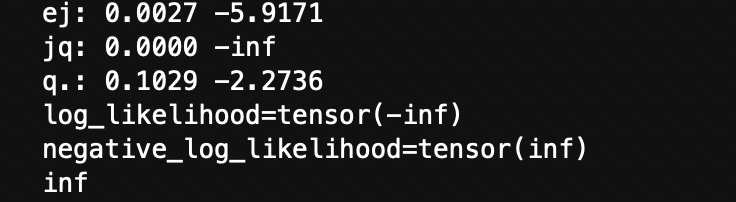

We have got `inf` probability of jq bi-gram. That's because there is 0 occurence of jq bi-gram. So, our loss is infinity in this example. j followed by q is 0 times. So, its 0% likely. 

## Simple fix (smooth the model)
We will add some fake counts. Add a count of 1 to everything

In [32]:
log_likelihood = 0.0
n = 0
for w in ["andrejq"]:
    chs = ['.'] + list(w) + ['.'] # <S> - start token, <E> - end token
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}') # we are looking at probability, log-probability that the model assigns to any of the following bi-grams
        
print(f'{log_likelihood=}')
negative_log_likelihood = -log_likelihood
print(f'{negative_log_likelihood=}')
# normalized log-likelihood
print(f'{negative_log_likelihood/n}') # average log-likelihood - this is our loss function, the lower it is the better, the higher it is the worse

# The job of our training that minimizes the negative log-likelihood of our loss.

.a: 0.1377 -1.9829
an: 0.1605 -1.8296
nd: 0.0384 -3.2594
dr: 0.0771 -2.5620
re: 0.1336 -2.0127
ej: 0.0027 -5.9171
jq: 0.0000 -inf
q.: 0.1029 -2.2736
log_likelihood=tensor(-inf)
negative_log_likelihood=tensor(inf)
inf


In [33]:
P = (N+1).float() # adding 1 to every count
P /= P.sum(1, keepdim=True) # inplace operation -> makes the operation faster 

In [34]:
log_likelihood = 0.0
n = 0
for w in words[:3]:
    chs = ['.'] + list(w) + ['.'] # <S> - start token, <E> - end token
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}') # we are looking at probability, log-probability that the model assigns to any of the following bi-grams
        
print(f'{log_likelihood=}')
negative_log_likelihood = -log_likelihood
print(f'{negative_log_likelihood=}')
# normalized log-likelihood
print(f'{negative_log_likelihood/n}') # average log-likelihood - this is our loss function, the lower it is the better, the higher it is the worse

# The job of our training that minimizes the negative log-likelihood of our loss.

.e: 0.0478 -3.0410
em: 0.0377 -3.2793
mm: 0.0253 -3.6753
ma: 0.3885 -0.9454
a.: 0.1958 -1.6305
.o: 0.0123 -4.3965
ol: 0.0779 -2.5526
li: 0.1774 -1.7293
iv: 0.0152 -4.1845
vi: 0.3508 -1.0476
ia: 0.1380 -1.9807
a.: 0.1958 -1.6305
.a: 0.1376 -1.9835
av: 0.0246 -3.7041
va: 0.2473 -1.3971
a.: 0.1958 -1.6305
log_likelihood=tensor(-38.8086)
negative_log_likelihood=tensor(38.8086)
2.4255354404449463


In [35]:
log_likelihood = 0.0
n = 0
for w in ["andrejq"]:
    chs = ['.'] + list(w) + ['.'] # <S> - start token, <E> - end token
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}') # we are looking at probability, log-probability that the model assigns to any of the following bi-grams
        
print(f'{log_likelihood=}')
negative_log_likelihood = -log_likelihood
print(f'{negative_log_likelihood=}')
# normalized log-likelihood
print(f'{negative_log_likelihood/n}') # average log-likelihood - this is our loss function, the lower it is the better, the higher it is the worse

# The job of our training that minimizes the negative log-likelihood of our loss.

.a: 0.1376 -1.9835
an: 0.1604 -1.8302
nd: 0.0384 -3.2594
dr: 0.0770 -2.5646
re: 0.1334 -2.0143
ej: 0.0027 -5.9004
jq: 0.0003 -7.9817
q.: 0.0970 -2.3331
log_likelihood=tensor(-27.8672)
negative_log_likelihood=tensor(27.8672)
3.4834020137786865


See https://www.youtube.com/watch?v=PaCmpygFfXo&t=2910s

Fixed the problem

# Neural Network

Neural Network - Bi-gram Character Level Language Model

## Creating a training set

See https://youtu.be/PaCmpygFfXo?t=4044

In [36]:
xs, ys = [], []
for w in words[:1]:
    chs = ['.'] + list(w) + ['.'] # <S> - start token, <E> - end token
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [37]:
xs

tensor([ 0,  5, 13, 13,  1])

In [38]:
ys

tensor([ 5, 13, 13,  1,  0])

## One-hot Encoding

PyTorch one-hot encoding - https://pytorch.org/docs/stable/generated/torch.nn.functional.one_hot.html

In [39]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float() # cast to float
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [40]:
xenc.shape

torch.Size([5, 27])

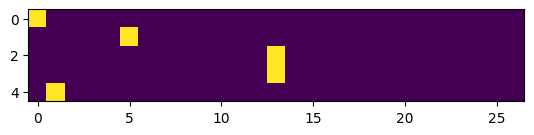

In [41]:
plt.imshow(xenc)

In [42]:
xenc.dtype

torch.float32

### Construct a neuron

In [43]:
W = torch.randn((27,27)) #last 27 - 27 neurons
xenc @ W

tensor([[-0.3378,  1.5885, -1.1148,  1.0827, -0.3089, -1.4757, -0.3847,  1.1507,
         -1.3242, -1.1728,  0.1710, -1.1725,  0.8051,  0.4559,  1.0957,  0.6802,
         -0.6122, -0.7499, -0.9291,  0.6351, -0.9632,  1.6055, -0.6137,  1.9209,
         -1.7420, -0.9725, -1.0165],
        [ 1.1876, -0.0738, -0.0656, -0.7551, -1.7796, -0.4609, -0.7326, -1.5895,
          0.3866, -1.1439, -1.9337,  1.7764, -0.1434, -1.5202, -0.1390,  0.7188,
          0.8167,  0.9212, -0.6226,  0.2886,  0.1994, -0.3488,  1.2966, -0.1607,
          1.6323,  0.1399, -0.1913],
        [ 0.0901, -0.0127,  1.1419,  1.1470,  0.0211, -0.6371,  0.6461,  0.3799,
         -1.3208, -0.0305,  0.4927,  0.7064, -0.0703, -1.1860,  2.1633, -0.3073,
          0.0460, -1.1940,  0.8687, -0.1995, -0.1587,  0.1590, -0.2951,  1.2942,
         -0.3204, -0.9402,  1.0175],
        [ 0.0901, -0.0127,  1.1419,  1.1470,  0.0211, -0.6371,  0.6461,  0.3799,
         -1.3208, -0.0305,  0.4927,  0.7064, -0.0703, -1.1860,  2.1633, -0.3073

In [44]:
(xenc @ W).shape # 5 - inputs, 27 - neurons

torch.Size([5, 27])

In [45]:
logits = xenc @ W # log-counts
counts = logits.exp() # exponentiated logits
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0172, 0.1180, 0.0079, 0.0712, 0.0177, 0.0055, 0.0164, 0.0762, 0.0064,
         0.0075, 0.0286, 0.0075, 0.0539, 0.0380, 0.0721, 0.0476, 0.0131, 0.0114,
         0.0095, 0.0455, 0.0092, 0.1200, 0.0130, 0.1646, 0.0042, 0.0091, 0.0087],
        [0.0838, 0.0237, 0.0239, 0.0120, 0.0043, 0.0161, 0.0123, 0.0052, 0.0376,
         0.0081, 0.0037, 0.1510, 0.0221, 0.0056, 0.0222, 0.0524, 0.0578, 0.0642,
         0.0137, 0.0341, 0.0312, 0.0180, 0.0935, 0.0218, 0.1308, 0.0294, 0.0211],
        [0.0250, 0.0226, 0.0717, 0.0720, 0.0234, 0.0121, 0.0437, 0.0334, 0.0061,
         0.0222, 0.0374, 0.0464, 0.0213, 0.0070, 0.1990, 0.0168, 0.0240, 0.0069,
         0.0545, 0.0187, 0.0195, 0.0268, 0.0170, 0.0835, 0.0166, 0.0089, 0.0633],
        [0.0250, 0.0226, 0.0717, 0.0720, 0.0234, 0.0121, 0.0437, 0.0334, 0.0061,
         0.0222, 0.0374, 0.0464, 0.0213, 0.0070, 0.1990, 0.0168, 0.0240, 0.0069,
         0.0545, 0.0187, 0.0195, 0.0268, 0.0170, 0.0835, 0.0166, 0.0089, 0.0633],
        [0.0867, 0.0211,

In [46]:
probs.shape

torch.Size([5, 27])

## Summary

In [47]:
xs # input data set

tensor([ 0,  5, 13, 13,  1])

In [48]:
ys # labels - correct next character in a sequence

tensor([ 5, 13, 13,  1,  0])

In [49]:
g = torch.Generator().manual_seed(2147483647)
# randomly initialize 27 neurons weights, each neuron receives 27 inputs
W = torch.randn((27, 27), generator=g)

In [50]:
# Forward Pass
# First encode all the inputs into one-hot representations
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
# We then multiply by the first layer of the neural net to get the logits
logits = xenc @ W # predict log-counts 
counts = logits.exp() # exponentiate the logits to get counts, equivalent to N
# We then normalize the counts to get probabilities
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character, the probablities summed up to 1.0
# btw, the last lines are together called a 'softmax'

#### Soft-max 

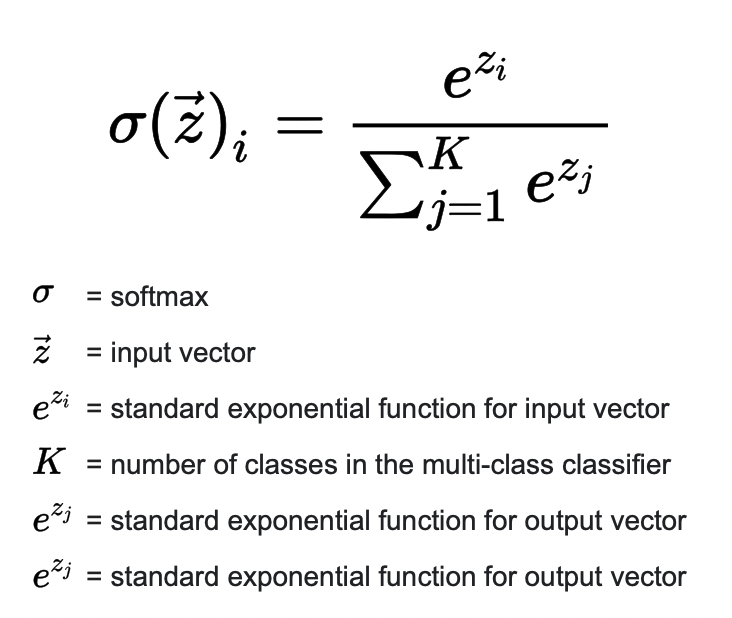


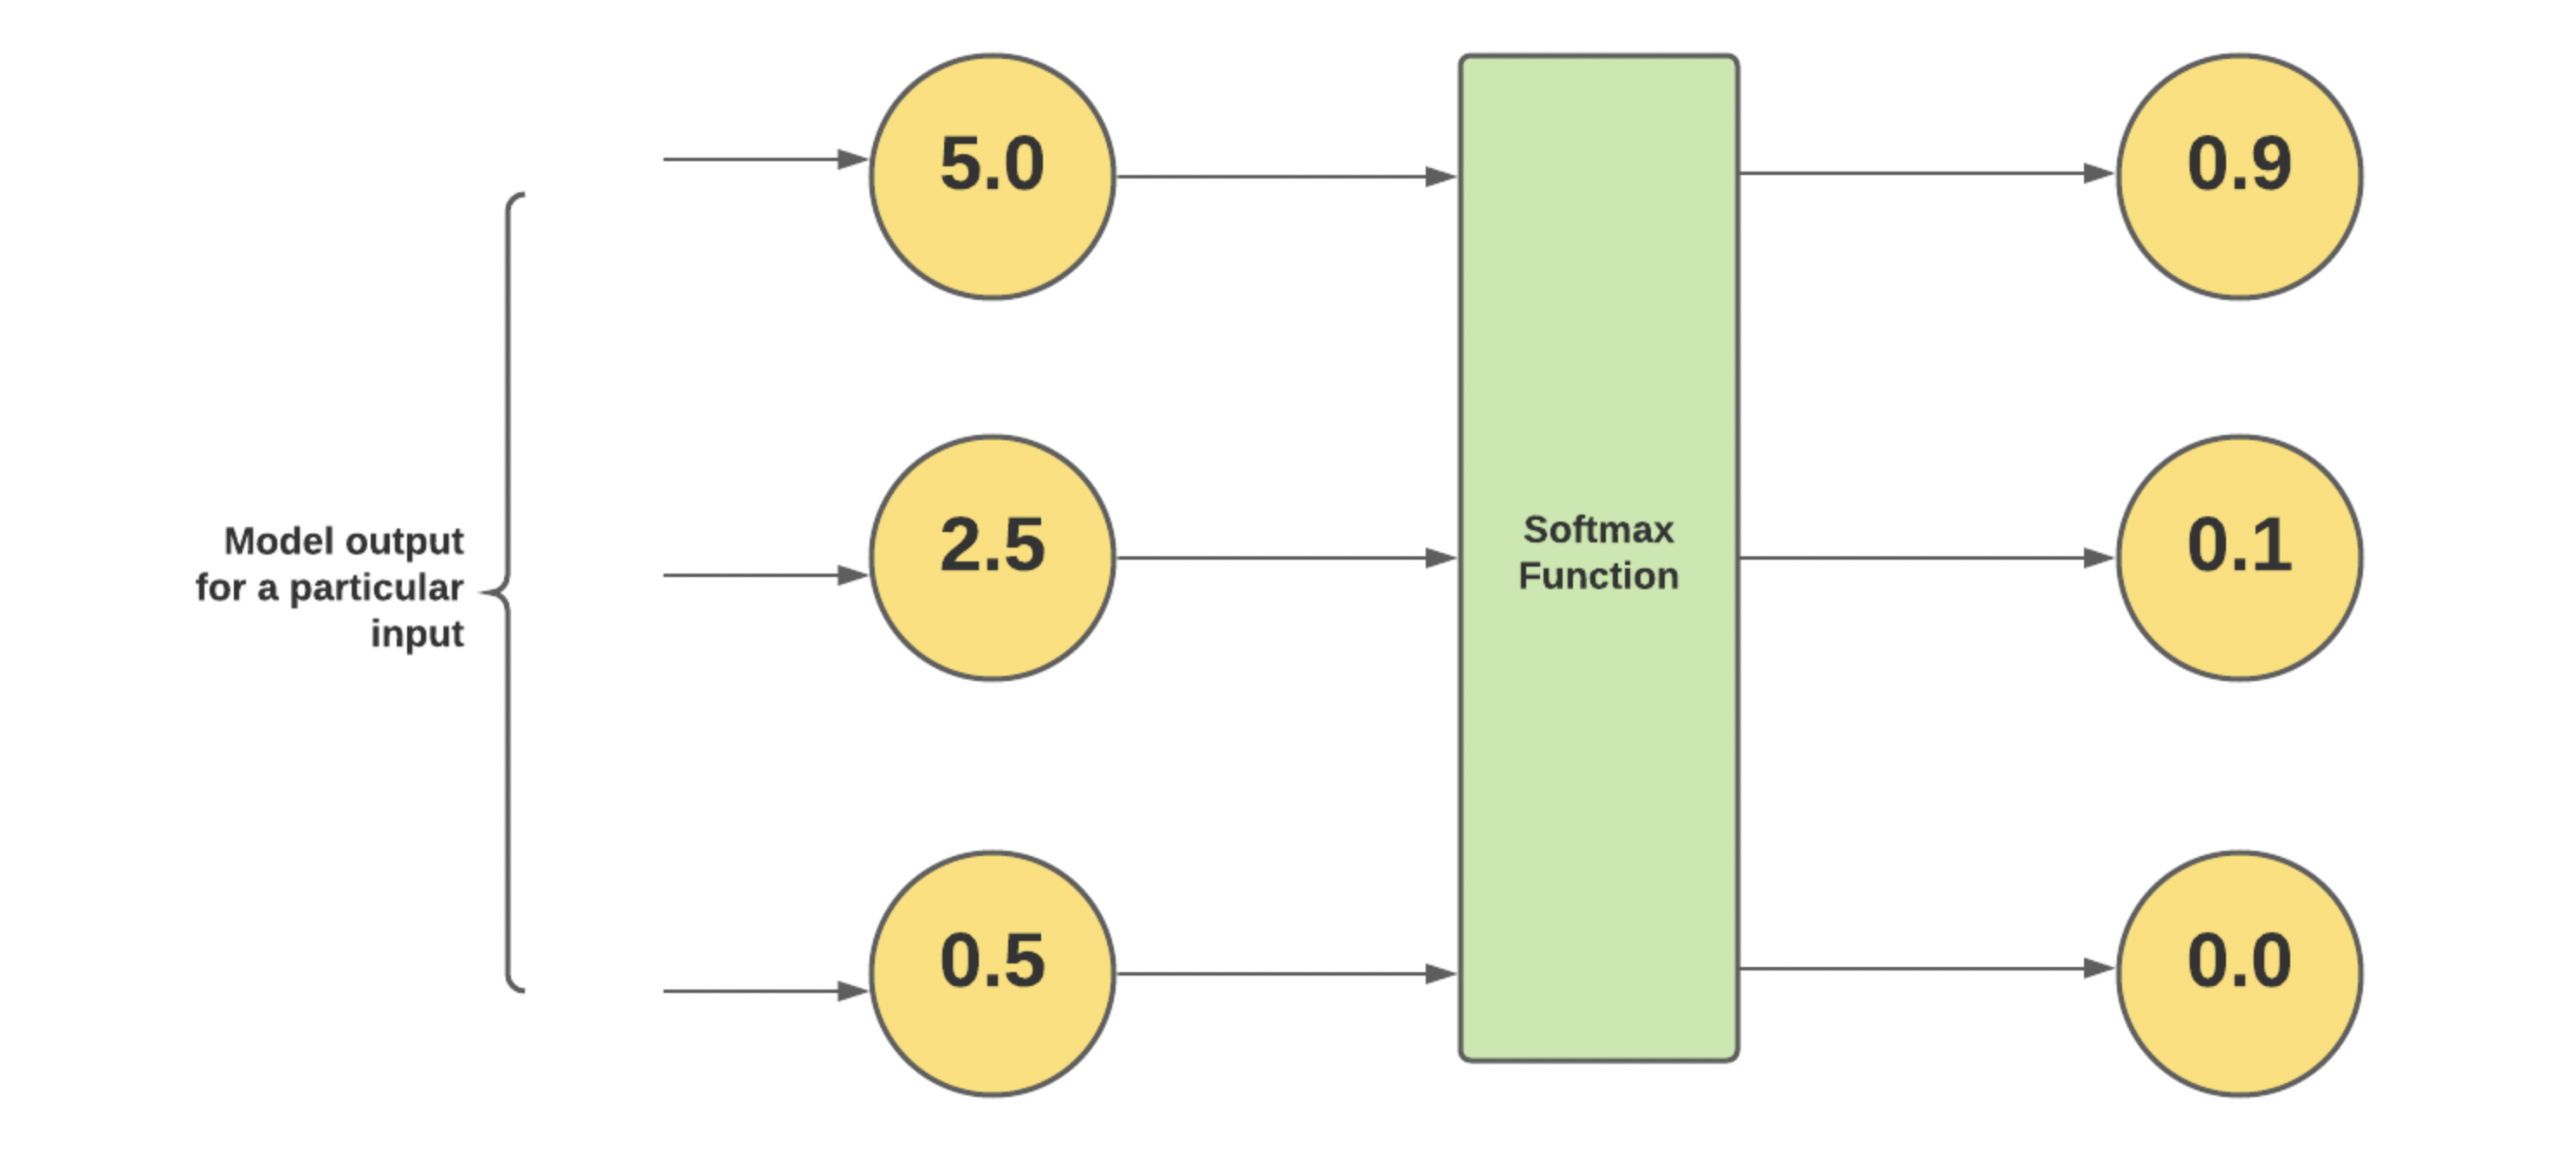

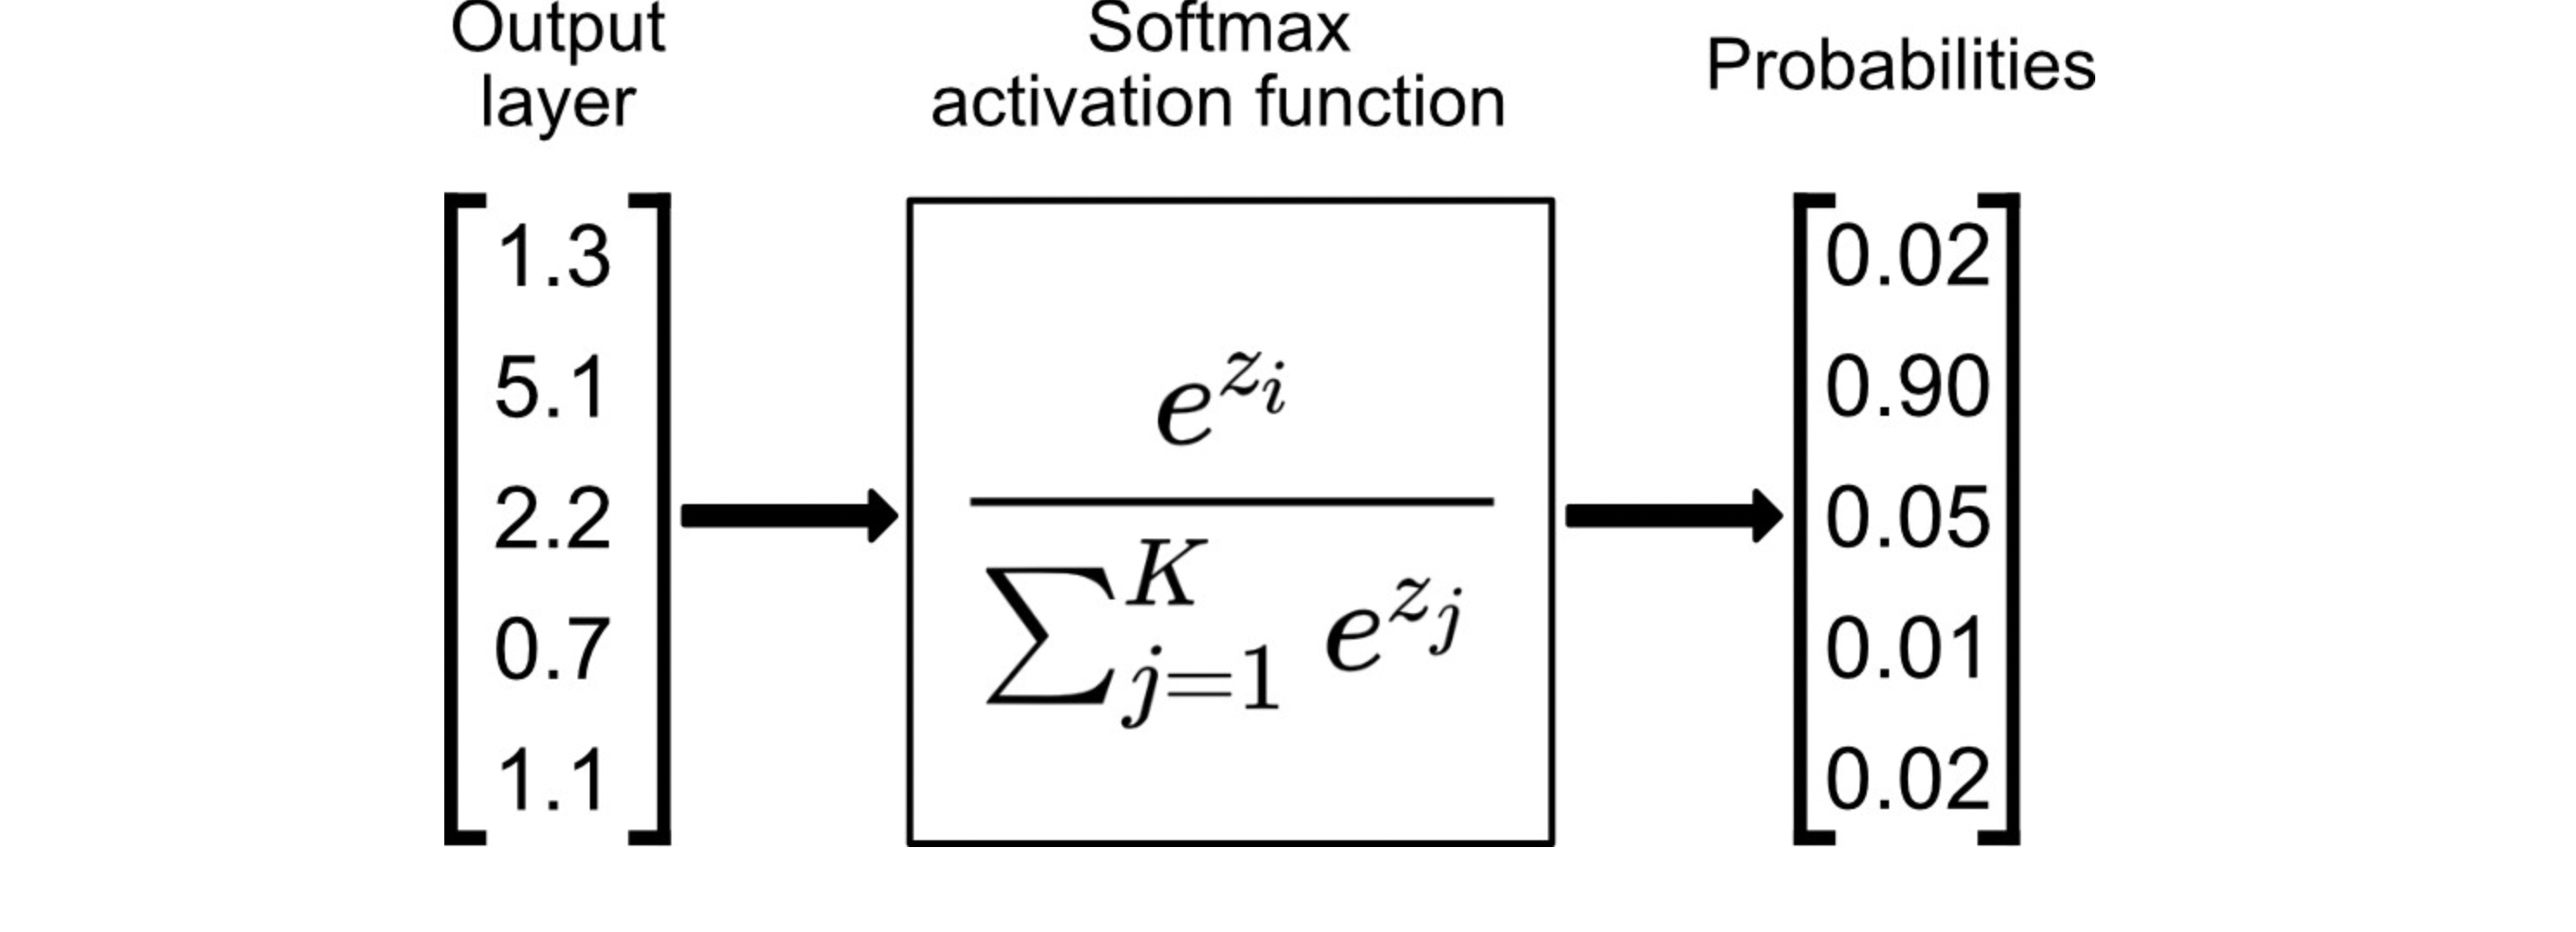


Softmax is a very often used layer in the neural network that takes the logits and exponentiates them. Divides and normalizes it. It is a way of taking outputs of the neural net layer. The outputs can be positive and negative. The softmax outputs the probability distributions. It outputs something that is always sums to 1 and the probabilities are positive. It is a kind of a normalization function. We can put it on top of any linear layer inside the neural net. It makes neural net output the probabilities. That's very often used.

In [51]:
probs.shape

torch.Size([5, 27])

In [52]:
nlls = torch.zeros(5)
for i in range(5):
    # i-th bi-gram
    x = xs[i].item() # input character index
    y = ys[i].item() # label character index
    print('-------------------')
    print(f'Bi-gram example {i+1}: {itos[x]}{itos[y]} (indexes {x}, {y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next character):', y)
    p = probs[i, y]
    print('probability assigned by the neural net to the correct character:', p.item())
    logp = torch.log(p)
    print("Log likelihood:", logp.item())
    nll = -logp
    print("Negative Log Likelihood:", nll.item())
    nlls[i] = nll
    
print('==========')
print("Average negative log likelihood, i.e loss", nlls.mean().item())

-------------------
Bi-gram example 1: .e (indexes 0, 5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the neural net to the correct character: 0.012286253273487091
Log likelihood: -4.3992743492126465
Negative Log Likelihood: 4.3992743492126465
-------------------
Bi-gram example 2: em (indexes 5, 13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the neur

In [53]:
# ==================== !!! OPTIMIZATION !!! ======================= YAYA

In [54]:
xs

tensor([ 0,  5, 13, 13,  1])

In [55]:
ys

tensor([ 5, 13, 13,  1,  0])

In [56]:
# randomly initialize 27 neurons weights, each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [57]:
# Forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts 
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character, the probablities summed up to 1.0
# btw, the last lines are together called a 'softmax'

In [58]:
# Calculating the loss
# for the first example, we are interested in getting the probability of index 5
# for the second example, we are interested in getting the probability of index 13, etc...
probs[0, 5], probs[1, 13], probs[2, 13], probs[3, 1], probs[4, 0]

(tensor(0.0123, grad_fn=<SelectBackward0>),
 tensor(0.0181, grad_fn=<SelectBackward0>),
 tensor(0.0267, grad_fn=<SelectBackward0>),
 tensor(0.0737, grad_fn=<SelectBackward0>),
 tensor(0.0150, grad_fn=<SelectBackward0>))

We want more efficient way to access the list of probabilities. One of the ways in PyTorch is passing all of the integers in the vectors 

In [59]:
torch.arange(5) # creates indexes

tensor([0, 1, 2, 3, 4])

In [60]:
probs[torch.arange(5), ys] #vectorized list of probabilities that is equivalent of line 58

tensor([0.0123, 0.0181, 0.0267, 0.0737, 0.0150], grad_fn=<IndexBackward0>)

In [61]:
-probs[torch.arange(5), ys].log().mean() # this is our loss (negative average log-likelihood)

tensor([-0.0123, -0.0181, -0.0267, -0.0737, -0.0150], grad_fn=<NegBackward0>)

In [62]:
# calculating the loss
loss = -probs[torch.arange(5), ys].log().mean() # vectorized loss (negative average log-likelihood)
loss

In [63]:
# Backward pass
# Set the gradient to zero
W.grad = None # equivalent to 0, but more efficient
loss.backward()

```python
# randomly initialize 27 neurons weights, each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

# Forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts 
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character, the probablities summed up to 1.0
loss = -probs[torch.arange(5), ys].log().mean()
loss

# Backward pass
W.grad = None
loss.backward()
```

When we did the forward pass, PyTorch like micrograd, keeps track of all mathematical operations under the hood. It builds the full computational graph. Just like the graphs, we have produced in the micrograd, they are existing inside PyTorch. So, it knows all the dependencies and all the mathematical operations. When we then calculate the loss, we can call `.backward()`. The `.backward()` fills in the gradients of all the intermediates all the way back to the weights, which are the parameters of our neural network. 



In [64]:
W.shape

torch.Size([27, 27])

In [65]:
W.grad.shape

torch.Size([27, 27])

Every element of `W.grad` tells us the influence of that weight on the loss function. See https://youtu.be/PaCmpygFfXo?t=6062

In [66]:
W.grad

tensor([[ 0.0121,  0.0020,  0.0025,  0.0008,  0.0034, -0.1975,  0.0005,  0.0046,
          0.0027,  0.0063,  0.0016,  0.0056,  0.0018,  0.0016,  0.0100,  0.0476,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0307,  0.0292],
        [-0.1970,  0.0017,  0.0079,  0.0020,  0.0121,  0.0062,  0.0217,  0.0026,
          0.0025,  0.0010,  0.0205,  0.0017,  0.0198,  0.0022,  0.0046,  0.0041,
          0.0082,  0.0016,  0.0180,  0.0106,  0.0093,  0.0062,  0.0010,  0.0066,
          0.0131,  0.0101,  0.0018],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

See the gradient information - https://youtu.be/PaCmpygFfXo?t=5569

In [67]:
print(loss.item())

3.7693049907684326


We can use the gradient information to update the weights.

In [68]:
# Update the weights
W.data += -0.1 * W.grad

## Everthing together

In [69]:
# create the dataset
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.'] # <.> - start token, <.> - end token
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the network
# randomly initialize 27 neurons weights, each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [70]:
# Gradient Descent
for k in range(100):
    # Forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    loss = -probs[torch.arange(num), ys].log().mean()
    print(loss.item())
    
    # Backward pass
    W.grad = None # set to zero the gradient
    loss.backward()
    
    # Update
    W.data += -50 * W.grad

3.758953809738159
3.3710994720458984
3.1540415287017822
3.020372152328491
2.9277102947235107
2.8604013919830322
2.809727907180786
2.77010178565979
2.738072395324707
2.711496353149414
2.6890029907226562
2.6696884632110596
2.6529300212860107
2.638277053833008
2.6253881454467773
2.613990545272827
2.60386323928833
2.5948216915130615
2.5867116451263428
2.5794036388397217
2.572789430618286
2.5667762756347656
2.5612878799438477
2.5562586784362793
2.551633596420288
2.547365665435791
2.5434155464172363
2.5397486686706543
2.5363364219665527
2.533154249191284
2.5301806926727295
2.5273966789245605
2.5247862339019775
2.522334575653076
2.520029067993164
2.5178580284118652
2.515810489654541
2.513878345489502
2.512052059173584
2.510324001312256
2.5086867809295654
2.5071346759796143
2.5056614875793457
2.504261016845703
2.5029289722442627
2.5016605854034424
2.5004522800445557
2.4992990493774414
2.498197317123413
2.497144937515259
2.4961376190185547
2.495173692703247
2.4942493438720703
2.493363380432129


The gradient based approach is significantly more flexible because we can expand this approach and complexify the neural net. Currently, we are just taking a single character and feeding into the neural net that is extremely simple. In the future, we are going to use more complex neural nets and taking multiple previous characters but fundamentally the output of the neural net will always be the logits. Those logits will be going through the exact same transformation. 

In [71]:
# create the dataset
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.'] # <S> - start token, <E> - end token
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the network
# randomly initialize 27 neurons weights, each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


### Regularization

About the regularization
https://youtu.be/PaCmpygFfXo?t=6634

When the W are all equal to each other or 0, the probabilities come out completely uniformed. So, try to incentivize the W's to be near zero, is basically equivalent to label smoothing. The more we incentivize that, the more smooth distribution we are going to achieve.

Regularization - we can augment the loss function to have small component called a regularization loss. 

In [72]:
(W**2).mean() # regularization

tensor(0.9665, grad_fn=<MeanBackward0>)

In [73]:
# Gradient Descent
for k in range(100):
    # Forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01 * (W**2).mean() # adding a regularization loss
    print(loss.item())
    
    # Backward pass
    W.grad = None # set to zero the gradient
    loss.backward()
    
    # Update
    W.data += -50 * W.grad

3.7686190605163574
3.3788061141967773
3.1610891819000244
3.027184247970581
2.934483051300049
2.867230176925659
2.8166537284851074
2.7771458625793457
2.745253324508667
2.7188303470611572
2.696505308151245
2.6773717403411865
2.6608052253723145
2.6463513374328613
2.633665084838867
2.622471332550049
2.6125476360321045
2.6037068367004395
2.595794916152954
2.5886809825897217
2.5822560787200928
2.5764293670654297
2.5711238384246826
2.566272735595703
2.5618226528167725
2.5577263832092285
2.5539445877075195
2.550442695617676
2.5471925735473633
2.5441696643829346
2.5413522720336914
2.538721799850464
2.536262035369873
2.5339581966400146
2.531797409057617
2.5297679901123047
2.527860164642334
2.5260636806488037
2.5243704319000244
2.522773265838623
2.521263837814331
2.519836664199829
2.5184857845306396
2.517204999923706
2.515990734100342
2.5148372650146484
2.5137410163879395
2.51269793510437
2.511704921722412
2.5107579231262207
2.509855031967163
2.5089924335479736
2.5081682205200195
2.50738024711608

Now this optimization has 2 components. Not only is it trying to make all the probabilities work out, but in addition to that there is an additional component that simultaneously tries to make all W's to be zero. The strength of the regularization is exactly controling the amount of counts to our matrix N. The more we increase it, the more regularization loss dominates the actual loss 

## Sample from the neural net model

In [74]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        # Forward pass
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float() # input to the network: one-hot encoding
        logits = xenc @ W # predict log-counts
        counts = logits.exp() # counts, equivalent to N
        probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
        
    print(''.join(out))

mor.
axx.
minaymoryles.
kondmaisah.
anchthizarie.


## Summary

- Introduced the bi-gram character level language model
- Trained the model
- Sampled from the model
- Evaluated the model using negative log-likelihood loss.
- We trained the model in two completely different ways that actually give the same result:
    - Count the frequency of all bi-grams and normalized
    - Used negative log-likelihood loss as a guide to optimizing the counts matrix (array) so that the loss is minimized in a gradient based framework